In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape
import seaborn as sns

from urllib.parse import urlencode
import urllib.request, json 

import pyproj 

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
%matplotlib inline 

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
gdf_school=gpd.read_file('./School_District_Characteristics_-_Current.geojson')

In [185]:
gdf_school.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(10.0, 75.0)

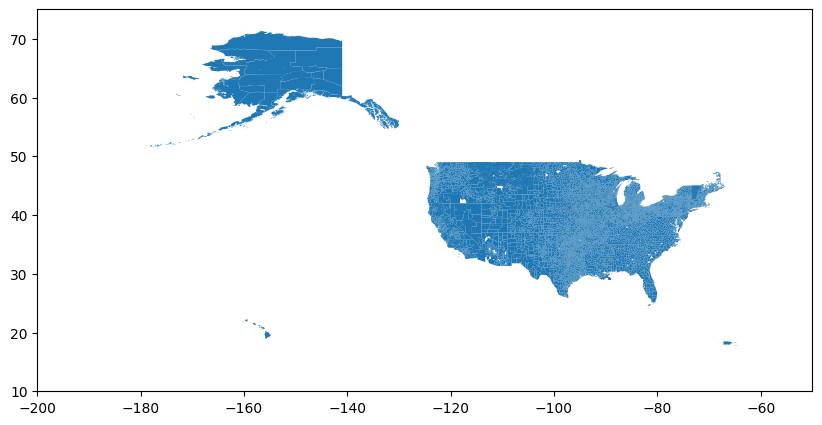

In [117]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_school.plot(ax=ax)

ax.set_xlim(-200, -50)
ax.set_ylim(10, 75) 

Data Loading

In [17]:
df_mapcsv = pd.read_csv('Data/School_District_Characteristics_-_Current.csv')
#let the value of District be uppercase
df_mapcsv['District'] = df_mapcsv['District'].str.upper()
# df_mapcsv['State'] = df_mapcsv['State'].str.upper()
df_mapcsv

,OBJECTID,SURVYEAR,State,LEAID,ST_LEAID,District,LSTREET1,LSTREET2,LCITY,LSTATE,LZIP,LZIP4,LEA_TYPE_TEXT,LEA_TYPE,GSLO,GSHI,SY_STATUS_TEXT,SCH,MEMBER,TOTTCH,STUTERATIO,LOCALE_TEXT,CONAME,COID,PHONE,Lat,Long,Shape__Area,Shape__Length
0,1,2021-2022,ALASKA,200007,AK-56,ALEUTIANS EAST BOROUGH SCHOOL DISTRICT,100 Mossberry Ln,NaN,Sand Point,AK,99661,0429,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,4,207.0,27.00,7.67,43-Rural: Remote,Aleutians East Borough,2,(907)383-5222,55.342221,-160.496135,5.764295e+10,7.503827e+06
1,2,2021-2022,ALASKA,200670,AK-40,PRIBILOF SCHOOL DISTRICT,930 Tolstoi Blvd,NaN,St. Paul Island,AK,99660,,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,2,61.0,5.35,11.40,43-Rural: Remote,Aleutians West Census Area,3,(907)546-3327,57.120896,-170.279219,6.715393e+08,2.249364e+05
2,3,2021-2022,ALASKA,200720,AK-47,UNALASKA CITY SCHOOL DISTRICT,55 E Broadway St,NaN,Unalaska,AK,99685,,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,2,354.0,28.00,12.64,43-Rural: Remote,Aleutians West Census Area,3,(907)581-3151,53.872671,-166.529624,8.043122e+08,2.725318e+05
3,4,2021-2022,ALASKA,200001,AK-31,LOWER KUSKOKWIM SCHOOL DISTRICT,1004 Ron Edwards Memorial Dr,NaN,Bethel,AK,99559,0305,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,29,3960.0,252.84,15.66,43-Rural: Remote,Bethel Census Area,6,(907)543-4912,60.802916,-161.772970,2.315774e+11,1.027379e+07
4,5,2021-2022,ALASKA,200004,AK-54,YUPIIT SCHOOL DISTRICT,1st Main St,NaN,Akiachak,AK,99551,0190,1-Regular local school district that is NOT a ...,1,KG,12,1-Open,3,445.0,34.00,13.09,43-Rural: Remote,Bethel Census Area,6,(907)825-3600,60.913883,-161.448992,1.827623e+08,9.150339e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13216,13217,2021-2022,NORTH DAKOTA,3800405,ND-53007,WILLISTON BASIN 7,1201 9th Ave NW,NaN,Williston,ND,58801,,1-Regular local school district that is NOT a ...,1,KG,12,3-New,13,5143.0,378.00,13.61,33-Town: Remote,Williams County,1966,(701)572-1580,48.158033,-103.640870,4.089000e+09,4.337182e+05
13217,13218,2021-2022,NORTH DAKOTA,3800406,ND-50018,GRAFTON 18,1548 School Rd,NaN,Grafton,ND,58237,,1-Regular local school district that is NOT a ...,1,PK,12,3-New,3,967.0,97.00,9.97,33-Town: Remote,Walsh County,1963,(701)352-1930,48.407349,-97.423913,1.844231e+09,3.802442e+05
13218,13219,2021-2022,VERMONT,5000450,VT-U076,WINDSOR CENTRAL UNIFIED UNION SCHOOL DISTRICT,70 Amsden Way,NaN,Woodstock,VT,5091,9801,2-Local school district that is a component of...,2,PK,12,1-Open,6,1067.0,80.25,13.30,42-Rural: Distant,Windsor County,3214,(802)457-1213,43.612104,-72.547524,1.578911e+09,1.952554e+05
13219,13220,2021-2022,MINNESOTA,2700480,MN-012910,ADA-BORUP-WEST PUBLIC SCHOOLS,604 W THORPE AVE,NaN,ADA,MN,56510,1027,1-Regular local school district that is NOT a ...,1,PK,12,4-Added,3,712.0,50.09,14.21,43-Rural: Remote,Norman County,1519,(218)784-5300,47.297264,-96.527145,2.994219e+09,3.626142e+05


In [16]:
df_con = pd.read_csv('Data/PEN_School_Book_Bans .csv')
df_con['District'] = df_con['District'].str.upper()
df_con['State'] = df_con['State'].str.upper()
df_con

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,PENNSYLVANIA,CENTRAL YORK SCHOOL DISTRICT,August 2021,Administrator
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,NEW YORK,MARLBORO CENTRAL SCHOOL DISTRICT,February 2022,Administrator
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,TEXAS,FREDERICKSBURG INDEPENDENT SCHOOL DISTRICT,March 2022,Administrator
...,...,...,...,...,...,...,...,...,...,...
2527,"Zia, Farhana",The Garden of My Imaan,Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,DUVAL COUNTY PUBLIC SCHOOLS,January 2022,Administrator
2528,"Ziemke, Kristin",Read the World: Rethinking Literacy for Empath...,Banned in Classrooms,"Muhtaris, Katie",NaN,NaN,PENNSYLVANIA,CENTRAL YORK SCHOOL DISTRICT,August 2021,Administrator
2529,"Zoboi, Ibi",American Street,Banned in Classrooms,NaN,NaN,NaN,PENNSYLVANIA,PENNRIDGE SCHOOL DISTRICT,August 2021,Administrator
2530,"Zoboi, Ibi",Black Enough: Stories of Being Young & Black i...,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator


In [22]:
df_mapcsv['Key'] = df_mapcsv['District'].apply(lambda x: ' '.join(x.split()[:2])).str.upper()
df_con['Key_1'] = df_con['District'].apply(lambda x: ' '.join(x.split()[:2])).str.upper()
df_merge_key = pd.merge(df_con, df_mapcsv,  left_on=['State','Key_1',] ,right_on=['State','Key'], how='inner')
df_merge_key = df_merge_key.drop('Key', axis=1)
df_merge_key = df_merge_key.drop('Key_1', axis=1)
df_merge_key['OBJECTID'] = df_merge_key['OBJECTID'].fillna(0).astype(int)
df_merge_key

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District_x,Date of Challenge/Removal,Origin of Challenge,OBJECTID,SURVYEAR,LEAID,ST_LEAID,District_y,LSTREET1,LSTREET2,LCITY,LSTATE,LZIP,LZIP4,LEA_TYPE_TEXT,LEA_TYPE,GSLO,GSHI,SY_STATUS_TEXT,SCH,MEMBER,TOTTCH,STUTERATIO,LOCALE_TEXT,CONAME,COID,PHONE,Lat,Long,Shape__Area,Shape__Length
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423
1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423
2,"Acito, Marc","How I Paid for College: A Novel of Sex, Theft,...",Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423
3,"Alexie, Sherman",The Absolutely True Diary of a Part-Time Indian,Banned in Libraries,NaN,"Forney, Ellen",NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423
4,"Alger, Cristina",Girls Like Us (2019),Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,"Satrapi, Marjane",Persepolis: The Story of a Childhood,Banned Pending Investigation,NaN,NaN,NaN,PENNSYLVANIA,FRANKLIN REGIONAL SCHOOL DISTRICT,March 2022,Administrator,10354,2021-2022,4210230,PA-107652603,FRANKLIN REGIONAL SD,3210 School Rd,NaN,Murrysville,PA,15668,,1-Regular local school district that is NOT a ...,1,KG,12,1-Open,4,3369.0,231.00,14.58,21-Suburb: Large,Westmoreland County,2477,(724)327-5456,40.426110,-79.668181,1.692047e+08,67437.063293
1293,"Slater, Dashka",The 57 Bus: A True Story of Two Teenagers and ...,Banned in Libraries and Classrooms,NaN,NaN,NaN,WISCONSIN,OCONOMOWOC AREA SCHOOL DISTRICT,May 2022,Formal Challenge,12799,2021-2022,5510890,WI-4060,OCONOMOWOC AREA SCHOOL DISTRICT,915 East Summit Avenue,NaN,Oconomowoc,WI,53066,,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,8,5031.0,345.80,14.55,21-Suburb: Large,Waukesha County,3321,(262)560-2111,43.147854,-88.463419,5.839349e+08,171637.335557
1294,"Spiegelman, Art",Maus 1: A Survivor's Tale: My Father Bleeds Hi...,Banned in Classrooms,NaN,NaN,NaN,TENNESSEE,MCMINN COUNTY SCHOOLS,January 2022,Administrator,10794,2021-2022,4702820,TN-00540,MCMINN COUNTY,3 South Hill ST,NaN,Athens,TN,37303,,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,9,5197.

In [23]:
# merge with geojson
merged_df = pd.merge(df_merge_key, gdf_school, left_on='OBJECTID', right_on='OBJECTID', how='left')
merged_df

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District_x,Date of Challenge/Removal,Origin of Challenge,OBJECTID,SURVYEAR_x,LEAID_x,ST_LEAID_x,District_y,LSTREET1_x,LSTREET2_x,LCITY_x,LSTATE_x,LZIP_x,LZIP4_x,LEA_TYPE_TEXT_x,LEA_TYPE_x,GSLO_x,GSHI_x,SY_STATUS_TEXT_x,SCH_x,MEMBER_x,TOTTCH_x,STUTERATIO_x,LOCALE_TEXT_x,CONAME_x,COID_x,PHONE_x,Lat_x,Long_x,Shape__Area_x,Shape__Length_x,SURVYEAR_y,STATENAME,LEAID_y,ST_LEAID_y,LEA_NAME,LSTREET1_y,LSTREET2_y,LCITY_y,LSTATE_y,LZIP_y,LZIP4_y,LEA_TYPE_TEXT_y,LEA_TYPE_y,GSLO_y,GSHI_y,SY_STATUS_TEXT_y,SCH_y,MEMBER_y,TOTTCH_y,STUTERATIO_y,LOCALE_TEXT_y,CONAME_y,COID_y,PHONE_y,Lat_y,Long_y,Shape__Area_y,Shape__Length_y,geometry
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,2021-2022,FLORIDA,1200930,FL-31,INDIAN RIVER,6500 57TH ST,,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,2021-2022,FLORIDA,1200930,FL-31,INDIAN RIVER,6500 57TH ST,,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
2,"Acito, Marc","How I Paid for College: A Novel of Sex, Theft,...",Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,2021-2022,FLORIDA,1200930,FL-31,INDIAN RIVER,6500 57TH ST,,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
3,"Alexie, Sherman",The Absolutely True Diary of a Part-Time Indian,Banned in Libraries,NaN,"Forney, Ellen",NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RIVER,6500 57TH ST,NaN,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,2021-2022,FLORIDA,1200930,FL-31,INDIAN RIVER,6500 57TH ST,,VERO BEACH,FL,32967,6002,1-Regular local school district that is NOT a ...,1,PK,12,1-Open,28,17366.0,1036.30,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
4,"Alger, Cristina",Girls Like Us (2019),Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,Administrator,1981,2021-2022,1200930,FL-31,INDIAN RI

In [25]:
# to csv
merged_df.to_csv('merged_fv.csv')

In [4]:
# to geojson
import geopandas as gpd
from shapely.geometry import shape, MultiPolygon
import pandas as pd
import json



In [2]:
import geopandas as gpd
from shapely.geometry import shape, MultiPolygon
import pandas as pd
import json

# Read CSV file
df = pd.read_csv('merged_fv.csv')



In [5]:
df.head()

,Unnamed: 0,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District_x,Date of Challenge/Removal,...,STUTERATIO_y,LOCALE_TEXT_y,CONAME_y,COID_y,PHONE_y,Lat_y,Long_y,Shape__Area_y,Shape__Length_y,geometry
0,0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,MULTIPOLYGON (((-80.3312964932195 27.557257709...
1,1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,MULTIPOLYGON (((-80.3312964932195 27.557257709...
2,2,"Acito, Marc","How I Paid for College: A Novel of Sex, Theft,...",Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,MULTIPOLYGON (((-80.3312964932195 27.557257709...
3,3,"Alexie, Sherman",The Absolutely True Diary of a Part-Time Indian,Banned in Libraries,NaN,"Forney, Ellen",NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,MULTIPOLYGON (((-80.3312964932195 27.557257709...
4,4,"Alger, Cristina",Girls Like Us (2019),Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,MULTIPOLYGON (((-80.3312964932195 27.557257709...


In [7]:
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)


In [9]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.head()

,Unnamed: 0,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District_x,Date of Challenge/Removal,...,STUTERATIO_y,LOCALE_TEXT_y,CONAME_y,COID_y,PHONE_y,Lat_y,Long_y,Shape__Area_y,Shape__Length_y,geometry
0,0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
1,1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
2,2,"Acito, Marc","How I Paid for College: A Novel of Sex, Theft,...",Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
3,3,"Alexie, Sherman",The Absolutely True Diary of a Part-Time Indian,Banned in Libraries,NaN,"Forney, Ellen",NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
4,4,"Alger, Cristina",Girls Like Us (2019),Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."


In [10]:
gdf.to_file('Data/merged_df.geojson', driver='GeoJSON', encoding='utf-8')

In [6]:
gdf_election = gpd.read_file('Data/precincts-with-results.geojson')

In [7]:
gdf_election

,GEOID,votes_dem,votes_rep,votes_total,votes_per_sqkm,pct_dem_lead,geometry
0,05047-1-A (Oz Wd 1),79.0,279.0,366.0,54.2,-54.6,"MULTIPOLYGON (((-93.88536 35.48376, -93.88405 ..."
1,05149-11 - Dutch Creek,6.0,31.0,37.0,0.3,-67.6,"POLYGON ((-93.56912 34.94763, -93.57895 34.947..."
2,05081-Franklin Township,53.0,383.0,450.0,3.8,-73.3,"POLYGON ((-93.98600 33.74165, -93.98546 33.741..."
3,05027-McNeil City,64.0,68.0,138.0,41.9,-2.9,"POLYGON ((-93.19438 33.34718, -93.19373 33.347..."
4,05027-Taylor Township,67.0,342.0,423.0,1.7,-65.0,"POLYGON ((-93.45912 33.01858, -93.46310 33.018..."
...,...,...,...,...,...,...,...
146591,56007-01-01,173.0,300.0,486.0,21.8,-26.1,"POLYGON ((-107.25933 41.77505, -107.25884 41.7..."
146592,56045-05-01,70.0,390.0,480.0,259.5,-66.7,"POLYGON ((-104.19354 43.85788, -104.19407 43.8..."
146593,56045-05-02,67.0,376.0,454.0,66.5,-68.1,"POLYGON ((-104.24595 43.85045, -104.24734 43.8..."
146594,56045-05-03,63.0,419.0,498.0,141.4,-71.5,"POLYGON ((-104.19009 43.84017, -104.19199 43.8..."


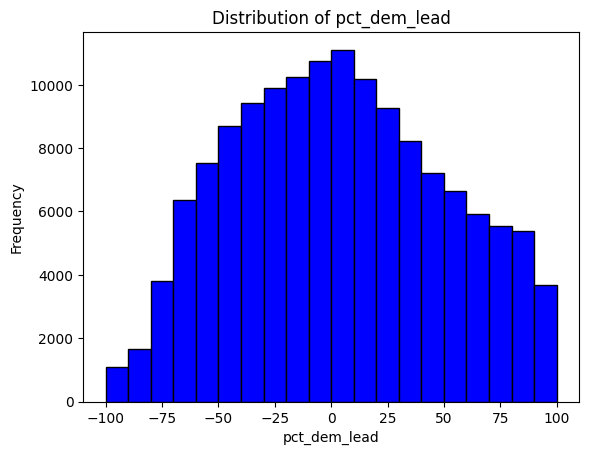

In [12]:
column_name = 'pct_dem_lead'
# 繪製直方圖
plt.hist(gdf_election[column_name], bins=20, color='blue', edgecolor='black')

# 添加標籤和標題
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# 顯示圖表
plt.show()

In [9]:
# 创建 GeoDataFrame

gdf_election['geometry'] = gdf_election['geometry'].apply(
    lambda x: shape(eval(x)))

# 保存为 GeoJSON 文件
geojson_file_path = 'electionByDistrict.geojson'
gdf.to_file(geojson_file_path, driver='GeoJSON')

TypeError: eval() arg 1 must be a string, bytes or code object

<Axes: >

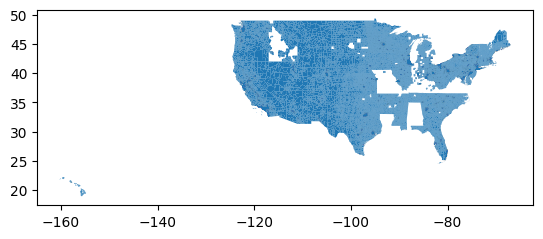

In [14]:
gdf_election.plot()

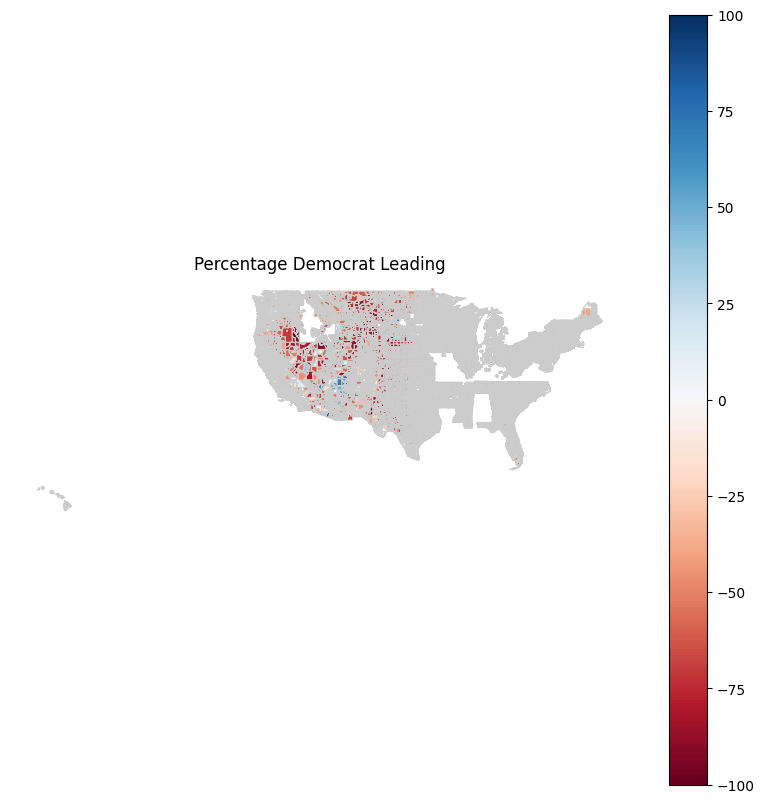

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取 GeoJSON 文件
gdf = gpd.read_file('Data/precincts-with-results.geojson')

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='pct_dem_lead', cmap='RdBu', linewidth=0.8,
         ax=ax, edgecolor='0.8', legend=True)

# 设置图例
ax.set_title('Percentage Democrat Leading')
ax.axis('off')

# 显示地图
plt.show()

In [27]:
# 读取数据集
election_data = pd.read_csv('Data/2020PresidentElection.csv')
election_data



,state,called,final,dem_votes,rep_votes,other_votes,dem_percent,rep_percent,other_percent,dem_this_margin,...,stusab,EV,X,Y,State_num,Center_X,Center_Y,,2016 Margin,Total 2016 Votes
0,Arizona,D,Yes,"1,672,143","1,661,686","53,497",49.4%,49.1%,1.6%,0.3%,...,AZ,11,2,2,4,205,374,,-0.035456,"2,573,165"
1,Florida,R,Yes,"5,297,045","5,668,731","101,680",47.9%,51.2%,0.9%,-3.4%,...,FL,29,8,0,12,787,520,,-0.011986,"9,420,039"
2,Georgia,D,Yes,"2,473,633","2,461,854","62,229",49.5%,49.3%,1.2%,0.2%,...,GA,16,7,1,13,734,419,,-0.051313,"4,092,373"
3,Iowa,R,Yes,"759,061","897,672","34,138",44.9%,53.1%,2.0%,-8.2%,...,IA,6,5,4,19,536,223,,-0.094068,"1,566,031"
4,Maine 2nd District,R,Yes,"168,696","196,692","10,961",44.8%,52.3%,2.9%,-7.4%,...,ME2,1,12,8,102,919,92,,-0.102882,"353,416"
5,Michigan,D,Yes,"2,804,040","2,649,852","85,410",50.6%,47.8%,1.5%,2.8%,...,MI,16,7,5,26,681,190,,-0.002230,"4,799,284"
6,Minnesota,D,Yes,"1,717,077","1,484,065","76,029",52.4%,45.3%,2.3%,7.1%,...,MN,10,5,5,27,519,120,,0.015201,"2,944,813"
7,Nebraska 2nd District,D,Yes,"176,468","154,377","6,909",52.2%,45.7%,2.0%,6.5%,...,NE2,1,12,6,104,438,238,,-0.022401,"291,680"
8,Nevada,D,Yes,"703,486","669,890","32,000",50.1%,47.7%,2.3%,2.4%,...,NV,6,2,4,32,136,240,,0.024171,"1,125,385"
9,New Hampshire,D,Yes,"424,921","365,654","15,607",52.7%,45.4%,1.9%,7.4%,...,NH,4,11,6,33,895,146,,0.003676,"744,158"


In [25]:
state_boundaries = pd.read_csv('Data/us-state-boundaries.csv')
state_boundaries

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,Oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,St Asgeojson,Geo Point 2D
0,16,278176477,0,18.217648,Puerto Rico,50,628200285,-66.410799,303146031,A,...,72,1779808,18.216472,Puerto Rico,G4000,9,0,72,"{""coordinates"": [[[[-67.2079369999424, 18.4422...","18.2157325628, -66.4146425123"
1,23,472276664,0,14.936784,Commonwealth of the Northern Mariana Islands,36,349301029,145.601021,-1625647860,A,...,69,1779809,16.797438,Commonwealth of the Northern Mariana Islands,G4000,9,0,69,"{""coordinates"": [[[[145.572602999898, 15.12501...","16.8164771029, 145.595809651"
2,31,1627312771,7,34.895526,Arkansas,44,-1334552525,-92.444626,266078934,A,...,5,68085,34.894021,Arkansas,G4000,3,0,5,"{""coordinates"": [[[-94.5521800000544, 36.10223...","34.899695632, -92.4393557454"
3,35,2136109036,5,38.647285,West Virginia,1,489848791,-80.618327,-1929409300,A,...,54,1779805,38.641186,West Virginia,G4000,3,0,54,"{""coordinates"": [[[-81.7472539997449, 39.09537...","38.6425782646, -80.6137013299"
4,40,-1616974352,1,41.597419,Rhode Island,6,1323457457,-71.527272,-1861167639,A,...,44,1219835,41.594025,Rhode Island,G4000,1,0,44,"{""coordinates"": [[[[-71.7897030003562, 41.7245...","41.5946933039, -71.524812176"
5,54,312831514,9,47.407324,Washington,20,-324557627,-120.575800,-1859906639,A,...,53,1779804,47.414899,Washington,G4000,4,0,53,"{""coordinates"": [[[-123.247918999905, 48.28455...","47.4116571169, -120.592673096"
6,55,235758874,7,30.863437,Louisiana,21,-2023496089,-91.798717,273332861,A,...,22,1629543,30.902586,Louisiana,G4000,3,0,22,"{""coordinates"": [[[-92.0691050000679, 33.00816...","30.9091786621, -91.8142984793"
7,38,73043361,4,46.315815,Minnesota,4,1750136443,-94.199663,-1899485909,A,...,27,662849,46.316485,Minnesota,G4000,2,0,27,"{""coordinates"": [[[-96.7843810003397, 46.63050...","46.3491388483, -94.1981561215"
8,42,1712577727,1,43.672691,New Hampshire,8,1028674404,-71.584315,-1858446377,A,...,33,1779794,43.674033,New Hampshire,G4000,1,0,33,"{""coordinates"": [[[-72.32989899992, 43.6002139...","43.6802448752, -71.5712354907"
9,12,-812563424,6,37.533684,Kentucky,34,-1906562745,-85.292980,-1985301492,A,...,21,1779786,37.535193,Kentucky,G4000,3,0,21,"{""coordinates"": [[[[-88.0613319998436, 37.5053...","37.5266027266, -85.2905397627"


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

# 读取 CSV 文件
csv_file_path = 'Data/election_df2.csv'
df = pd.read_csv(csv_file_path)

# 将 coordinates 列中的字符串转换为几何对象
df['geometry'] = df['geometry'].apply(lambda x: shape(eval(x)))

# 创建 GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# 保存为 GeoJSON 文件
geojson_file_path = 'election.geojson'
gdf.to_file(geojson_file_path, driver='GeoJSON')

In [3]:
bb = 'Data/PEN_School_Book_Bans .csv'
bb_df = pd.read_csv(bb)
bb_df.head()

,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District,Date of Challenge/Removal,Origin of Challenge
0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,Florida,Indian River County School District,November 2021,Administrator
1,"Acevedo, Elizabeth",Clap When You Land,Banned in Classrooms,NaN,NaN,NaN,Pennsylvania,Central York School District,August 2021,Administrator
2,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,Florida,Indian River County School District,November 2021,Administrator
3,"Acevedo, Elizabeth",The Poet X,Banned in Libraries and Classrooms,NaN,NaN,NaN,New York,Marlboro Central School District,February 2022,Administrator
4,"Acevedo, Elizabeth",The Poet X,Banned Pending Investigation,NaN,NaN,NaN,Texas,Fredericksburg Independent School District,March 2022,Administrator


In [16]:
state_counts = bb_df['State'].value_counts()
# state_counts
state_counts_df = pd.DataFrame(
    {'State': state_counts.index, 'Count': state_counts.values})
print(state_counts_df)
state_counts_df.to_csv('state_counts.csv', index=False)

             State  Count
0            Texas    801
1          Florida    566
2     Pennsylvania    458
3        Tennessee    349
4         Oklahoma     43
5         Michigan     41
6           Kansas     30
7        Wisconsin     29
8         Missouri     27
9            Idaho     26
10         Georgia     23
11     Mississippi     22
12        Virginia     19
13         Indiana     18
14  North Carolina     16
15        New York     13
16            Utah     12
17            Iowa      8
18        Illinois      5
19    South Dakota      5
20      Washington      5
21            Ohio      4
22      New Jersey      3
23       Minnesota      1
24        Maryland      1
25         Vermont      1
26          Alaska      1
27    Rhode Island      1
28           Maine      1
29  South Carolina      1
30        Arkansas      1
31          Oregon      1


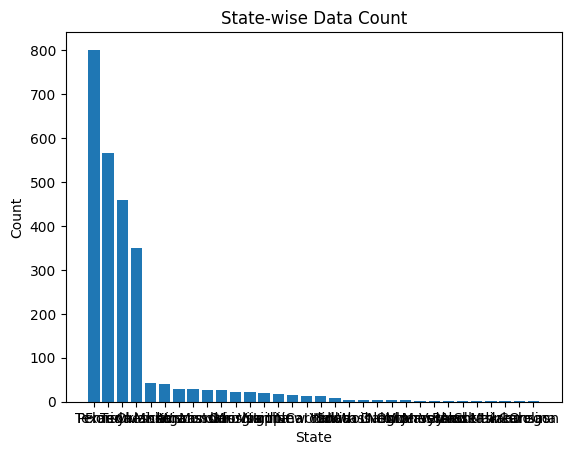

In [15]:
plt.bar(state_counts_df['State'], state_counts_df['Count'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Data Count')
plt.show()

In [25]:
book_counts = bb_df['Title'].value_counts()
book_counts_df = pd.DataFrame(
    {'Title': book_counts.index, 'Count': book_counts.values})
print(book_counts_df.head(50))
# print(book_counts_df)
# state_counts_df.to_csv('state_counts.csv', index=False)

                                                Title  Count
0                              Gender Queer: A Memoir     41
1                                All Boys Aren't Blue     29
2                                     Out of Darkness     24
3                                      The Bluest Eye     22
4                                            Lawn Boy     17
5                                     The Hate U Give     17
6     The Absolutely True Diary of a Part-Time Indian     16
7                      Me and Earl and the Dying Girl     14
8                                     The Kite Runner     12
9                                Crank (Crank Series)     12
10                               Thirteen Reasons Why     12
11                                           l8r, g8r     12
12                                            Beloved     11
13                             Drama: A Graphic Novel     11
14                                   Melissa (George)     11
15                      

In [11]:
florida_data = bb_df[bb_df['State'] == 'Florida']
title_counts = florida_data['Title'].value_counts()
top_ten_titles = title_counts.head(10)
print(top_ten_titles)

Title
The Hate U Give                                    8
Thirteen Reasons Why                               8
Nineteen Minutes                                   7
Beloved                                            7
The Bluest Eye                                     7
Tricks (Tricks Series)                             7
All Boys Aren't Blue                               6
The Absolutely True Diary of a Part-Time Indian    6
The Kite Runner                                    6
Melissa (George)                                   6
Name: count, dtype: int64


In [12]:
pennsylvania_data = bb_df[bb_df['State'] == 'Pennsylvania']
title_counts = pennsylvania_data['Title'].value_counts()
top_ten_titles = title_counts.head(10)
print(top_ten_titles)

Title
Gender Queer: A Memoir                                            6
All Boys Aren't Blue                                              4
Me and Earl and the Dying Girl                                    2
The Haunted House Next Door (Desmond Cole Ghost Patrol Series)    1
Niño Wrestles the World (Niño Series)                             1
Dreamers                                                          1
Thank You, Omu!                                                   1
Saturday                                                          1
The Guide for White Women Who Teach Black Boys                    1
Early Sunday Morning                                              1
Name: count, dtype: int64


In [ ]:
tennessee_data = bb_df[bb_df['State'] == 'Tennessee']
title_counts = pennsylvania_data['Title'].value_counts()
top_ten_titles = title_counts.head(10)
print(top_ten_titles)

In [15]:
import pandas as pd

# 定義你想分析的州的列表
states_to_analyze = ['Texas', 'Florida','Tennessee', 'New York','Virginia', 'Michigan','Pennsylvania',]

# 建立一個空的資料框，用於存儲結果
result_df = pd.DataFrame(columns=['State', 'Title', 'Count'])

# 遍歷每個州，執行分析
for state in states_to_analyze:
    state_data = bb_df[bb_df['State'] == state]
    title_counts = state_data['Title'].value_counts().reset_index()
    title_counts.columns = ['Title', 'Count']
    title_counts['State'] = state
    result_df = pd.concat([result_df, title_counts], ignore_index=True)

# 將結果按照州和計數排序
result_df = result_df.sort_values(
    by=['State', 'Count'], ascending=[True, False])

# 取出每個州的前十名
top_ten_per_state = result_df.groupby('State').head(10)

# 顯示結果
print(top_ten_per_state)

         State                                              Title Count
581    Florida                                    The Hate U Give     8
582    Florida                               Thirteen Reasons Why     8
583    Florida                                   Nineteen Minutes     7
584    Florida                                            Beloved     7
585    Florida                                     The Bluest Eye     7
...        ...                                                ...   ...
1356  Virginia                                          Triangles     1
1357  Virginia        Beyond Magenta: Transgender Teens Speak Out     1
1358  Virginia                        When Aidan Became A Brother     1
1359  Virginia                                     The Bluest Eye     1
1360  Virginia  Good Trouble: Lessons from the Civil Rights Pl...     1

[70 rows x 3 columns]


In [16]:
# 將結果輸出為 CSV 檔案
top_ten_per_state.to_csv('top_ten_per_state.csv', index=False)

In [2]:
# read geojson_file_path

gdf_ban = gpd.read_file('Data/merged_df.geojson')

In [3]:
gdf_ban

,Unnamed: 0,Author,Title,Type of Ban,Secondary Author(s),Illustrator(s),Translator(s),State,District_x,Date of Challenge/Removal,...,STUTERATIO_y,LOCALE_TEXT_y,CONAME_y,COID_y,PHONE_y,Lat_y,Long_y,Shape__Area_y,Shape__Length_y,geometry
0,0,"Àbíké-Íyímídé, Faridah",Ace of Spades,Banned in Libraries and Classrooms,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
1,1,"Acevedo, Elizabeth",The Poet X,Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
2,2,"Acito, Marc","How I Paid for College: A Novel of Sex, Theft,...",Banned Pending Investigation,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
3,3,"Alexie, Sherman",The Absolutely True Diary of a Part-Time Indian,Banned in Libraries,NaN,"Forney, Ellen",NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
4,4,"Alger, Cristina",Girls Like Us (2019),Banned in Libraries,NaN,NaN,NaN,FLORIDA,INDIAN RIVER COUNTY SCHOOL DISTRICT,November 2021,...,16.76,22-Suburb: Mid-size,Indian River County,499,(772)564-3000,27.698458,-80.459426,1.704494e+09,409338.147423,"MULTIPOLYGON (((-80.33130 27.55726, -80.33129 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1292,"Satrapi, Marjane",Persepolis: The Story of a Childhood,Banned Pending Investigation,NaN,NaN,NaN,PENNSYLVANIA,FRANKLIN REGIONAL SCHOOL DISTRICT,March 2022,...,14.58,21-Suburb: Large,Westmoreland County,2477,(724)327-5456,40.426110,-79.668181,1.692047e+08,67437.063293,"POLYGON ((-79.67957 40.50735, -79.67956 40.507..."
1293,1293,"Slater, Dashka",The 57 Bus: A True Story of Two Teenagers and ...,Banned in Libraries and Classrooms,NaN,NaN,NaN,WISCONSIN,OCONOMOWOC AREA SCHOOL DISTRICT,May 2022,...,14.55,21-Suburb: Large,Waukesha County,3321,(262)560-2111,43.147854,-88.463419,5.839349e+08,171637.335557,"MULTIPOLYGON (((-88.56068 43.04501, -88.56561 ..."
1294,1294,"Spiegelman, Art",Maus 1: A Survivor's Tale: My Father Bleeds Hi...,Banned in Classrooms,NaN,NaN,NaN,TENNESSEE,MCMINN COUNTY SCHOOLS,January 2022,...,15.42,41-Rural: Fringe,McMinn County,2734,(423)745-1612,35.441493,-84.594588,1.617733e+09,329766.612533,"POLYGON ((-84.58447 35.64442, -84.58446 35.643..."
1295,1295,"Stone, Nic",Dear Martin,Banned in Classrooms,NaN,NaN,NaN,NORTH CAROLINA,HAYWOOD COUNTY SCHOOLS,January 2022,...,13.79,21-Suburb: Large,Haywood County,1856,(828)456-2400,35.497500,-82.972441,2.173923e+09,252651.903347,"POLYGON ((-82.88391 35.67824, -82.88398 35.678..."
